# Image Recognition
### **Step 1: Load the Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_path = '/content/drive/MyDrive/Job/Github/data/Images'


In [ ]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,  # Add some rotation for augmentation
    width_shift_range=0.2,  # Horizontal shift
    height_shift_range=0.2,  # Vertical shift
    shear_range=0.2,  # Shearing
    zoom_range=0.2,  # Zooming
    horizontal_flip=True,  # Horizontal flipping
    fill_mode='nearest',
    validation_split=0.2
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    data_path,
    target_size=(800, 800),
    batch_size=20,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    data_path,
    target_size=(800, 800),
    batch_size=20,
    class_mode='categorical',
    subset='validation'
)

Found 5745 images belonging to 61 classes.
Found 1410 images belonging to 61 classes.


In [ ]:
# Get class indices
class_indices = train_generator.class_indices

# Print class indices
print("List of classes and their indices:", class_indices)


List of classes and their indices: {'airport_inside': 0, 'artstudio': 1, 'auditorium': 2, 'bakery': 3, 'bar': 4, 'bathroom': 5, 'bedroom': 6, 'bookstore': 7, 'bowling': 8, 'buffet': 9, 'casino': 10, 'children_room': 11, 'church_inside': 12, 'classroom': 13, 'cloister': 14, 'closet': 15, 'clothingstore': 16, 'computerroom': 17, 'concert_hall': 18, 'corridor': 19, 'deli': 20, 'dentaloffice': 21, 'dining_room': 22, 'elevator': 23, 'fastfood_restaurant': 24, 'florist': 25, 'gameroom': 26, 'garage': 27, 'greenhouse': 28, 'grocerystore': 29, 'gym': 30, 'hairsalon': 31, 'hospitalroom': 32, 'inside_bus': 33, 'inside_subway': 34, 'jewelleryshop': 35, 'kindergarden': 36, 'kitchen': 37, 'mall': 38, 'meeting_room': 39, 'movietheater': 40, 'museum': 41, 'nursery': 42, 'office': 43, 'operating_room': 44, 'pantry': 45, 'poolinside': 46, 'prisoncell': 47, 'restaurant': 48, 'restaurant_kitchen': 49, 'shoeshop': 50, 'stairscase': 51, 'studiomusic': 52, 'subway': 53, 'toystore': 54, 'trainstation': 55, '

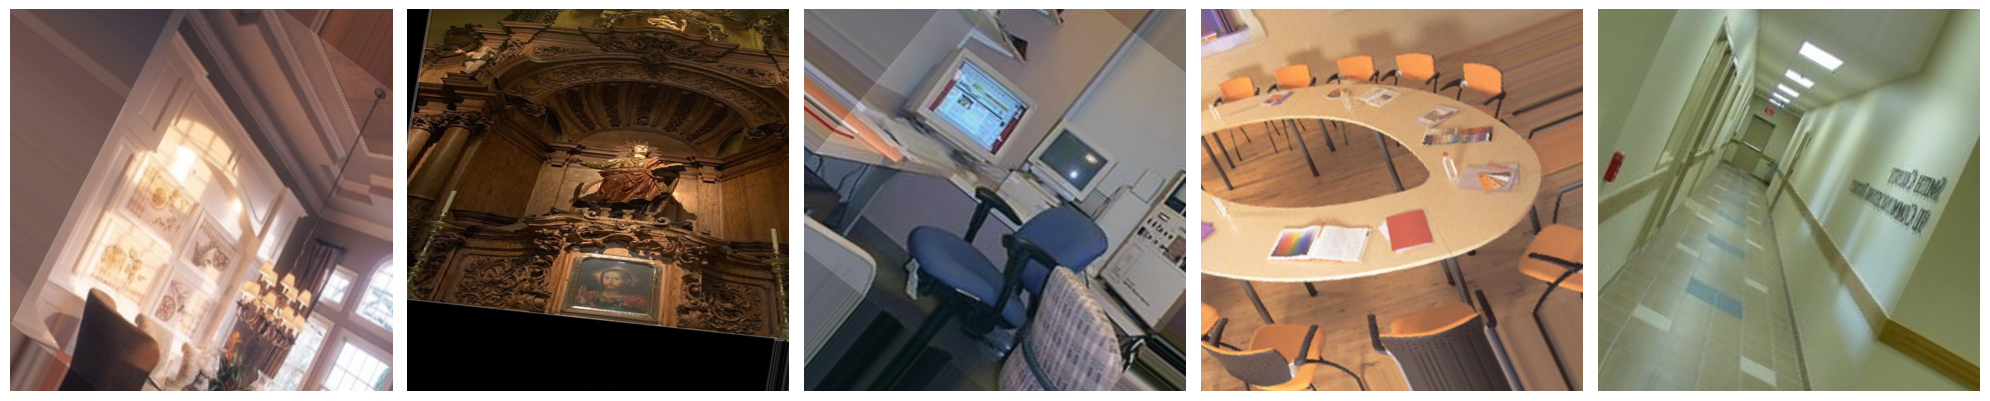

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Fetch a batch of images
x_batch, y_batch = next(train_generator)

# Define function to plot images in a grid
def plot_images(images_arr, title="Images"):
    fig, axes = plt.subplots(1, len(images_arr), figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)  # Removed the conversion to uint8
        ax.axis('off')
    plt.tight_layout()
    plt.show()


# Plot images
plot_images(x_batch[:5])  # Change the number to how many images you want to display


In [ ]:
steps_per_epoch=5
epochs=5
validation_steps=5
# # Train the model
# steps_per_epoch = max(1, train_generator.samples // train_generator.batch_size)
# validation_steps = max(1, validation_generator.samples // validation_generator.batch_size)


### Step 2: Build a Baseline CNN Model

---



In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(800, 800, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(61, activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 798, 798, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 399, 399, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 397, 397, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 198, 198, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 196, 196, 128)     73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 98, 98, 128)       0

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(train_generator,
                    steps_per_epoch=steps_per_epoch,
                    epochs=epochs,
                    validation_data=validation_generator,
                    validation_steps=validation_steps)

Epoch 1/5
5/5 [==============================] - 90s 17s/step - loss: 12.8364 - accuracy: 0.0300 - val_loss: 3.9732 - val_accuracy: 0.0100
Epoch 2/5
5/5 [==============================] - 79s 18s/step - loss: 3.9011 - accuracy: 0.0500 - val_loss: 3.5708 - val_accuracy: 0.1400
Epoch 3/5
5/5 [==============================] - 79s 18s/step - loss: 3.7371 - accuracy: 0.0600 - val_loss: 3.6453 - val_accuracy: 0.1200
Epoch 4/5
5/5 [==============================] - 78s 17s/step - loss: 3.6544 - accuracy: 0.0700 - val_loss: 3.5893 - val_accuracy: 0.0400
Epoch 5/5
5/5 [==============================] - 69s 15s/step - loss: 3.4456 - accuracy: 0.0900 - val_loss: 3.5429 - val_accuracy: 0.0600


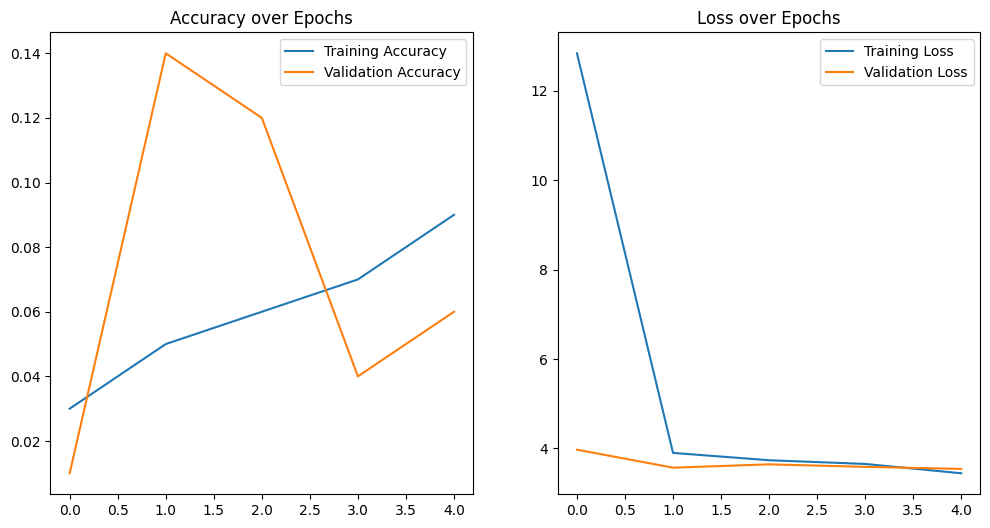

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.show()


### Step 3: Build a CNN Model with Data Augmentation and Dropout

In [ ]:
# Build the CNN model with dropout layers
model_with_augmentation = models.Sequential()
model_with_augmentation.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(800, 800, 3)))
model_with_augmentation.add(layers.MaxPooling2D((2, 2)))
model_with_augmentation.add(layers.Dropout(0.25))  # Dropout layer after pooling

model_with_augmentation.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_with_augmentation.add(layers.MaxPooling2D((2, 2)))
model_with_augmentation.add(layers.Dropout(0.25))  # Another dropout layer

model_with_augmentation.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_with_augmentation.add(layers.MaxPooling2D((2, 2)))
model_with_augmentation.add(layers.Dropout(0.4))  # Increasing dropout rate for deeper layers

model_with_augmentation.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_with_augmentation.add(layers.MaxPooling2D((2, 2)))
model_with_augmentation.add(layers.Dropout(0.4))  # Consistent dropout rate

model_with_augmentation.add(layers.Flatten())
model_with_augmentation.add(layers.Dense(512, activation='relu'))
model_with_augmentation.add(layers.Dropout(0.5))  # Dropout before the final dense layer
model_with_augmentation.add(layers.Dense(61, activation='softmax'))

model_with_augmentation.summary()

# Compile the model
model_with_augmentation.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 798, 798, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 399, 399, 32)      0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 399, 399, 32)      0         
                                                                 
 conv2d_5 (Conv2D)           (None, 397, 397, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 198, 198, 64)      0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 198, 198, 64)     

In [ ]:
history_aug = model_with_augmentation.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_steps
)

Epoch 1/5
5/5 [==============================] - 87s 19s/step - loss: 37.4254 - accuracy: 0.0400 - val_loss: 4.0611 - val_accuracy: 0.1100
Epoch 2/5
5/5 [==============================] - 76s 17s/step - loss: 4.2239 - accuracy: 0.0500 - val_loss: 4.1045 - val_accuracy: 0.0300
Epoch 3/5
5/5 [==============================] - 69s 15s/step - loss: 3.9962 - accuracy: 0.0900 - val_loss: 4.0066 - val_accuracy: 0.0200
Epoch 4/5
5/5 [==============================] - 67s 15s/step - loss: 3.7475 - accuracy: 0.0800 - val_loss: 3.9120 - val_accuracy: 0.0400
Epoch 5/5
5/5 [==============================] - 74s 17s/step - loss: 3.4584 - accuracy: 0.0600 - val_loss: 3.7991 - val_accuracy: 0.1700


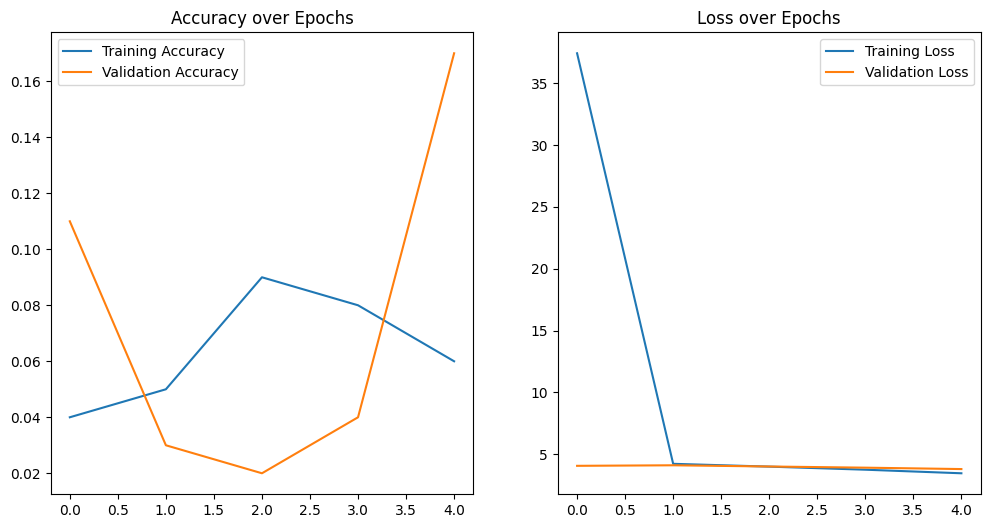

In [ ]:
# Plotting the training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_aug.history['accuracy'], label='Training Accuracy')
plt.plot(history_aug.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history_aug.history['loss'], label='Training Loss')
plt.plot(history_aug.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.show()

### Step 4: Build a CNN Model Based on Pre-trained Model (Transfer Learning)

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras import Input

# Load the ResNet50 model pre-trained on ImageNet data
base_model = ResNet50(weights='imagenet', include_top=False, input_tensor=Input(shape=(800, 800, 3)))

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Create custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)  # Add dropout for regularization
predictions = Dense(61, activation='softmax')(x)  # Final layer with softmax activation for 61 classes

# This is the model we will train
model_pre = Model(inputs=base_model.input, outputs=predictions)

# Model summary to see all layers
model_pre.summary()

# Compile the model
model_pre.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 800, 800, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 806, 806, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 400, 400, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 400, 400, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          

In [ ]:
# Train the model
history_transfer = model_pre.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_steps
)

Epoch 1/5
5/5 [==============================] - 89s 17s/step - loss: 7.7276 - accuracy: 0.0400 - val_loss: 5.3265 - val_accuracy: 0.0600
Epoch 2/5
5/5 [==============================] - 75s 17s/step - loss: 6.7397 - accuracy: 0.0800 - val_loss: 4.8217 - val_accuracy: 0.0200
Epoch 3/5
5/5 [==============================] - 168s 40s/step - loss: 5.6021 - accuracy: 0.0300 - val_loss: 3.8144 - val_accuracy: 0.0700
Epoch 4/5
5/5 [==============================] - 68s 15s/step - loss: 4.6761 - accuracy: 0.0800 - val_loss: 3.8207 - val_accuracy: 0.0200
Epoch 5/5
5/5 [==============================] - 74s 17s/step - loss: 3.9945 - accuracy: 0.0500 - val_loss: 3.6438 - val_accuracy: 0.0800


### Step 5:Which model do you recommend for the model in Q2, Q3, and Q4? Justify your answer.

Evaluating Baseline CNN Model:

In [ ]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(validation_generator, steps=1)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Evaluate the model on test data
test_loss_aug, test_accuracy_aug = model_with_augmentation.evaluate(validation_generator, steps=1)
print("Test Loss (with augmentation):", test_loss_aug)
print("Test Accuracy (with augmentation):", test_accuracy_aug)

# Evaluate the model on test data
test_loss_transfer, test_accuracy_transfer = model_pre.evaluate(validation_generator, steps=1)
print("Test Loss (transfer learning):", test_loss_transfer)
print("Test Accuracy (transfer learning):", test_accuracy_transfer)

1/1 [==============================] - 5s 5s/step - loss: 3.1478 - accuracy: 0.1000
Test Loss: 3.1478443145751953
Test Accuracy: 0.10000000149011612
1/1 [==============================] - 3s 3s/step - loss: 3.7433 - accuracy: 0.1500
Test Loss (with augmentation): 3.7433342933654785
Test Accuracy (with augmentation): 0.15000000596046448
1/1 [==============================] - 4s 4s/step - loss: 3.1628 - accuracy: 0.1500
Test Loss (transfer learning): 3.162771701812744
Test Accuracy (transfer learning): 0.15000000596046448


# Part II

In [ ]:
import pandas as pd

# Define the path to the dataset
file_path = '/content/drive/MyDrive/Job/Github/data/training.1600000.processed.noemoticon.csv'

# Load the dataset into a DataFrame
df = pd.read_csv(file_path, header=None, encoding='latin-1')

# Assign column names
df.columns = ['target', 'ids', 'date', 'flag', 'user', 'text']

# Display the first few rows of the DataFrame
print(df.head())

   target         ids                          date      flag  \
0       0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1       0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2       0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3       0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4       0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   

              user                                               text  
0  _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1    scotthamilton  is upset that he can't update his Facebook by ...  
2         mattycus  @Kenichan I dived many times for the ball. Man...  
3          ElleCTF    my whole body feels itchy and like its on fire   
4           Karoli  @nationwideclass no, it's not behaving at all....  


In [ ]:
# Display dataset information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB
None


In [ ]:
# Display summary statistics
print(df.describe())

             target           ids
count  1.600000e+06  1.600000e+06
mean   2.000000e+00  1.998818e+09
std    2.000001e+00  1.935761e+08
min    0.000000e+00  1.467810e+09
25%    0.000000e+00  1.956916e+09
50%    2.000000e+00  2.002102e+09
75%    4.000000e+00  2.177059e+09
max    4.000000e+00  2.329206e+09


### 2: Clean and Preprocess the Text Data, and Split into Training and Test *Dataset*

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Clean and preprocess text data (you can add more preprocessing steps as needed)
def preprocess_text(text):
    # Example: convert text to lowercase
    text = text.lower()
    return text

# Apply preprocessing to the 'text' column
df['text'] = df['text'].apply(preprocess_text)

# Split dataset into training and test sets
train_texts, test_texts, train_labels, test_labels = train_test_split(df['text'], df['target'], test_size=0.2, random_state=42)

# Tokenize the texts
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(train_texts)

train_sequences = tokenizer.texts_to_sequences(train_texts)
test_sequences = tokenizer.texts_to_sequences(test_texts)

# Pad sequences to ensure uniform length
max_length = 100
train_data = pad_sequences(train_sequences, maxlen=max_length)
test_data = pad_sequences(test_sequences, maxlen=max_length)


NameError: name 'df' is not defined

### 3: Build a baseline RNN model using embedding layer and GRU on the training dataset and evaluate it on the test dataset.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense

# Build the baseline RNN model
baseline_model = Sequential()
baseline_model.add(Embedding(10000, 16, input_length=max_length))
baseline_model.add(GRU(32))
baseline_model.add(Dense(1, activation='sigmoid'))

baseline_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

baseline_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           160000    
                                                                 
 gru (GRU)                   (None, 32)                4800      
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 164833 (643.88 KB)
Trainable params: 164833 (643.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Train the model
baseline_model.fit(train_data, train_labels, epochs=5, batch_size=128, validation_split=0.2)

# Evaluate the model on test dataset
test_loss, test_accuracy = baseline_model.evaluate(test_data, test_labels)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Epoch 1/5
8000/8000 [==============================] - 95s 11ms/step - loss: -137.8408 - accuracy: 2.5391e-05 - val_loss: -268.3370 - val_accuracy: 0.0000e+00
Epoch 2/5
8000/8000 [==============================] - 67s 8ms/step - loss: -397.5277 - accuracy: 0.0000e+00 - val_loss: -528.0920 - val_accuracy: 0.0000e+00
Epoch 3/5
8000/8000 [==============================] - 66s 8ms/step - loss: -657.0159 - accuracy: 0.0000e+00 - val_loss: -787.9852 - val_accuracy: 0.0000e+00
Epoch 4/5
8000/8000 [==============================] - 65s 8ms/step - loss: -916.4586 - accuracy: 0.0000e+00 - val_loss: -1047.9481 - val_accuracy: 0.0000e+00
Epoch 5/5
10000/10000 [==============================] - 40s 4ms/step - loss: -1489.3477 - accuracy: 0.1044
Test Loss: -1489.34765625
Test Accuracy: 0.10439687222242355


### 4:Build a second RNN model using embedding layer and LSTM and evaluate it on the test dataset.

In [ ]:
from tensorflow.keras.layers import LSTM

# Build the second RNN model using embedding layer and LSTM
lstm_model = Sequential()
lstm_model.add(Embedding(10000, 16, input_length=max_length))
lstm_model.add(LSTM(32))
lstm_model.add(Dense(1, activation='sigmoid'))

lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

lstm_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 16)           160000    
                                                                 
 lstm (LSTM)                 (None, 32)                6272      
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 166305 (649.63 KB)
Trainable params: 166305 (649.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Train the model
lstm_model.fit(train_data, train_labels, epochs=5, batch_size=128, validation_split=0.2)

# Evaluate the model on test dataset
test_loss_lstm, test_accuracy_lstm = lstm_model.evaluate(test_data, test_labels)
print("Test Loss (LSTM):", test_loss_lstm)
print("Test Accuracy (LSTM):", test_accuracy_lstm)

Epoch 1/5
8000/8000 [==============================] - 82s 10ms/step - loss: -159.7852 - accuracy: 0.0965 - val_loss: -314.4634 - val_accuracy: 0.1372
Epoch 2/5
8000/8000 [==============================] - 67s 8ms/step - loss: -465.6476 - accuracy: 0.1474 - val_loss: -618.2406 - val_accuracy: 0.1653
Epoch 3/5
8000/8000 [==============================] - 67s 8ms/step - loss: -772.5640 - accuracy: 0.1536 - val_loss: -916.1461 - val_accuracy: 0.1911
Epoch 4/5
8000/8000 [==============================] - 66s 8ms/step - loss: -1080.3116 - accuracy: 0.1550 - val_loss: -1225.2800 - val_accuracy: 0.1887
Epoch 5/5
10000/10000 [==============================] - 42s 4ms/step - loss: -1538.8766 - accuracy: 0.1503
Test Loss (LSTM): -1538.8765869140625
Test Accuracy (LSTM): 0.1502625048160553


### 5: Build a third RNN model using embedding layer and GRU and LSTM and evaluate it on the test dataset.

In [ ]:
# Build the third RNN model using both GRU and LSTM
combined_model = Sequential()
combined_model.add(Embedding(10000, 16, input_length=max_length))
combined_model.add(GRU(16, return_sequences=True))
combined_model.add(LSTM(16))
combined_model.add(Dense(1, activation='sigmoid'))

combined_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

combined_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 16)           160000    
                                                                 
 gru_1 (GRU)                 (None, 100, 16)           1632      
                                                                 
 lstm_1 (LSTM)               (None, 16)                2112      
                                                                 
 dense_8 (Dense)             (None, 1)                 17        
                                                                 
Total params: 163761 (639.69 KB)
Trainable params: 163761 (639.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Train the model
combined_model.fit(train_data, train_labels, epochs=5, batch_size=128, validation_split=0.2)

# Evaluate the model on test dataset
test_loss_combined, test_accuracy_combined = combined_model.evaluate(test_data, test_labels)
print("Test Loss (Combined):", test_loss_combined)
print("Test Accuracy (Combined):", test_accuracy_combined)

Epoch 1/5
8000/8000 [==============================] - 115s 14ms/step - loss: -72.3790 - accuracy: 2.4414e-05 - val_loss: -139.5056 - val_accuracy: 0.0000e+00
Epoch 2/5
8000/8000 [==============================] - 95s 12ms/step - loss: -206.1616 - accuracy: 0.0000e+00 - val_loss: -273.4361 - val_accuracy: 0.0000e+00
Epoch 3/5
8000/8000 [==============================] - 101s 13ms/step - loss: -339.7662 - accuracy: 0.0000e+00 - val_loss: -407.2031 - val_accuracy: 0.0000e+00
Epoch 4/5
8000/8000 [==============================] - 97s 12ms/step - loss: -473.4198 - accuracy: 0.0000e+00 - val_loss: -541.1647 - val_accuracy: 0.0000e+00
Epoch 5/5
10000/10000 [==============================] - 56s 6ms/step - loss: -679.3788 - accuracy: 0.0000e+00
Test Loss (Combined): -679.3787841796875
Test Accuracy (Combined): 0.0


In [ ]:
print(history_baseline.history)


{'loss': [-1637.114013671875], 'accuracy': [0.1305263638496399], 'val_loss': [-1791.5765380859375], 'val_accuracy': [0.12669530510902405]}


### 6. Which model do you recommend for the model in Q3, Q4, and Q5? Justify your answer.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report

# Function to plot training and validation loss curves
def plot_loss_curves(history, model_name):
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(model_name + ' - Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Function to plot training and validation accuracy curves
def plot_accuracy_curves(history, model_name):
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(model_name + ' - Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(model_name + ' - Confusion Matrix')
    plt.colorbar()
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# Function to plot ROC curve and calculate AUC
def plot_roc_curve(y_true, y_pred_probs, model_name):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(model_name + ' - ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

# Function to print precision, recall, and F1-score
def print_classification_report(y_true, y_pred, model_name):
    print(model_name + ' - Classification Report:')
    print(classification_report(y_true, y_pred))

In [ ]:
# Define History callback for each model
history_baseline = baseline_model.fit(train_data, train_labels, epochs=5, batch_size=128, validation_split=0.2)
history_lstm = lstm_model.fit(train_data, train_labels, epochs=5, batch_size=128, validation_split=0.2)
history_combined = combined_model.fit(train_data, train_labels, epochs=5, batch_size=128, validation_split=0.2)

Epoch 1/5
8000/8000 [==============================] - 67s 8ms/step - loss: -1950.9095 - accuracy: 0.1372 - val_loss: -2092.6570 - val_accuracy: 0.1272
Epoch 2/5
8000/8000 [==============================] - 61s 8ms/step - loss: -2258.7148 - accuracy: 0.1370 - val_loss: -2398.3589 - val_accuracy: 0.1496
Epoch 3/5
8000/8000 [==============================] - 62s 8ms/step - loss: -2565.6917 - accuracy: 0.1419 - val_loss: -2696.3745 - val_accuracy: 0.1448
Epoch 4/5
8000/8000 [==============================] - 61s 8ms/step - loss: -2872.3945 - accuracy: 0.1408 - val_loss: -2999.2446 - val_accuracy: 0.1346
Epoch 5/5
8000/8000 [==============================] - 61s 8ms/step - loss: -3182.6431 - accuracy: 0.1440 - val_loss: -3297.6904 - val_accuracy: 0.1124
Epoch 1/5
8000/8000 [==============================] - 63s 8ms/step - loss: -2007.8506 - accuracy: 0.1604 - val_loss: -2135.9626 - val_accuracy: 0.1699
Epoch 2/5
8000/8000 [==============================] - 63s 8ms/step - loss: -2313.8459 -

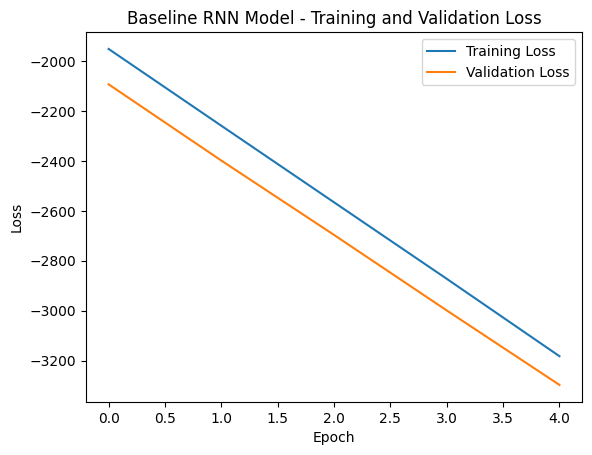

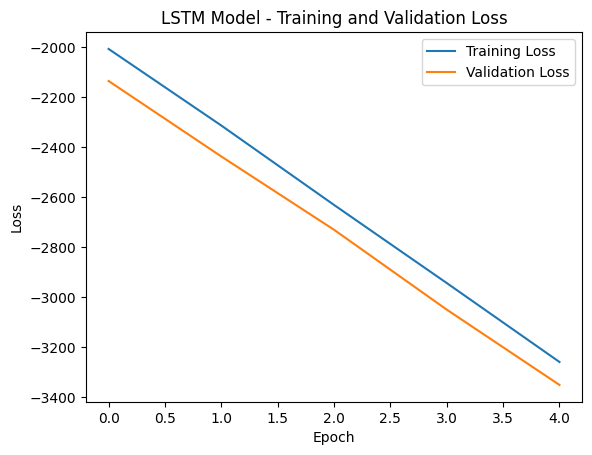

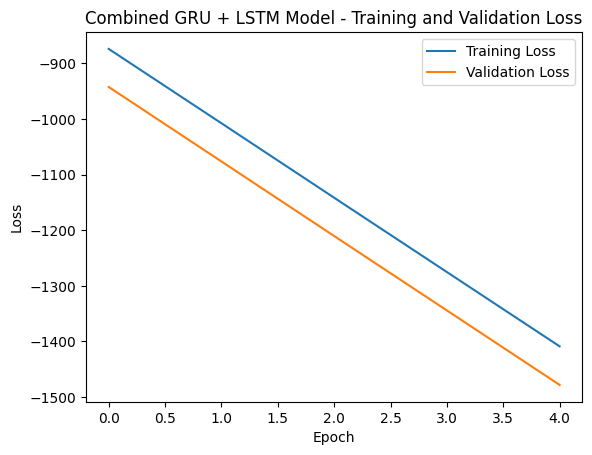

In [ ]:
# Plot loss curves for each model
plot_loss_curves(history_baseline, 'Baseline RNN Model')
plot_loss_curves(history_lstm, 'LSTM Model')
plot_loss_curves(history_combined, 'Combined GRU + LSTM Model')


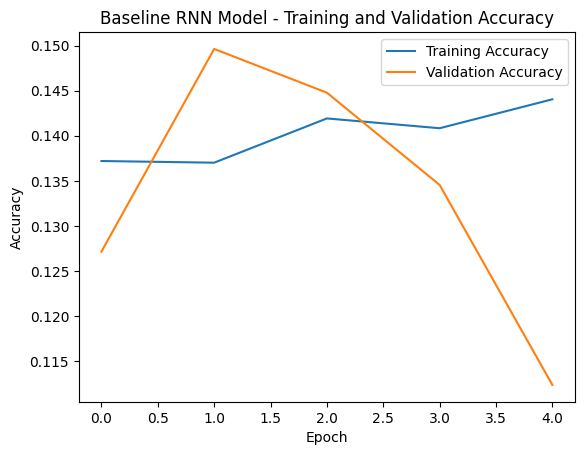

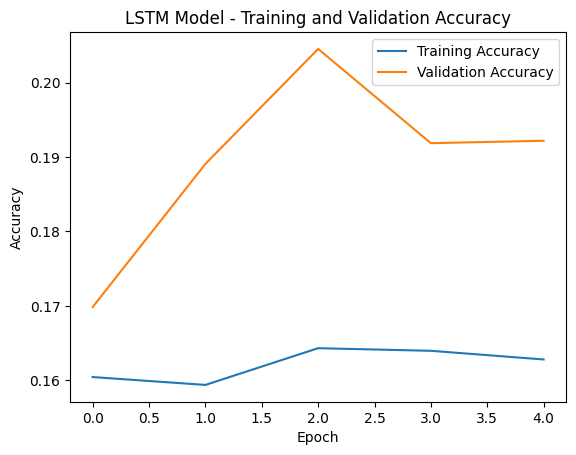

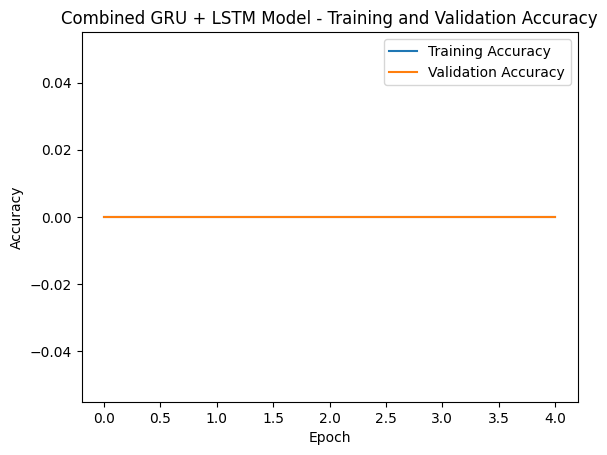

In [ ]:

# Plot accuracy curves for each model
plot_accuracy_curves(history_baseline, 'Baseline RNN Model')
plot_accuracy_curves(history_lstm, 'LSTM Model')
plot_accuracy_curves(history_combined, 'Combined GRU + LSTM Model')
